In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import nltk
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#text preprocessing (same as last week's lab)
reviews = pd.read_csv("imdbReviews.csv")

reviews.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [3]:
reviews['Sentiment'].value_counts()

Sentiment
POS    1000
NEG    1000
Name: count, dtype: int64

In [ ]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])
# as we can see, positive = 1 and negative = 0

[1 1 1 1 1 1 1 1 1 1]
0    POS
1    POS
2    POS
3    POS
4    POS
5    POS
6    POS
7    POS
8    POS
9    POS
Name: Sentiment, dtype: object


In [7]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [8]:
#get the review text for preprocessing
text = reviews['Text']
#text[:5]

In [ ]:
text1 = []

# --- text preprocessing ---
for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
    
 
#text1[:5]

In [10]:
text1 = pd.Series(text1)
#text1[:5]

In [11]:
#remove stop words
    
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
#text1[:5]

In [12]:
#apply stemming
ps = nltk.PorterStemmer()

text1 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
text1[:5]

0    girlfight follow project dwell new york high s...
1    hollywood north euphem movi industri went cana...
2    show definit funniest show current tv start wa...
3    minut pure holiday terror okay scari sure funt...
4    seri random seemingli insignific theft sister ...
dtype: object

In [13]:
reviews1 = list(zip(text1, label))

In [14]:
reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,girlfight follow project dwell new york high s...,1
1,hollywood north euphem movi industri went cana...,1
2,show definit funniest show current tv start wa...,1
3,minut pure holiday terror okay scari sure funt...,1
4,seri random seemingli insignific theft sister ...,1
...,...,...
1995,tourist head ireland school trip learn druid e...,0
1996,two film use scare peopl god event horizon one...,0
1997,ulis literatur teacher arriv coastal town fell...,0
1998,um okay guess get whole shakycam gorillastyl f...,0


In [15]:
#ttransform the data using tf-idf with a maximum of 10000 features
tv=TfidfVectorizer(max_features=10000)

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

tv_reviews.shape

(2000, 10000)

In [20]:
#######################################
###             k-means             ###
#######################################

kmeans = KMeans(n_clusters=2)
kmeans.fit(tv_reviews)

#clusters = kmeans.labels_.tolist()

labels=kmeans.labels_
clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])

for i in range(2):
        print(clusters[clusters['cluster'] == i])

                                                  title  cluster
0     Girlfight follows a project dwelling New York ...        0
2     That '70s Show is definitely the funniest show...        0
3     9/10- 30 minutes of pure holiday terror. Okay,...        0
4     A series of random, seemingly insignificant th...        0
5     A very good adaptation of the novel by amrita ...        0
...                                                 ...      ...
1992  To make any film about the supposed end of the...        0
1993  To quote the film, It's better not to know. Be...        0
1995  Tourists head to Ireland for a school trip to ...        0
1997  Ulises is a literature teacher that arrives to...        0
1999  Unfortunately this film, 54 was a pathetic att...        0

[1319 rows x 2 columns]
                                                  title  cluster
1     Hollywood North is an euphemism from the movie...        1
7     Although the beginning of the movie in New Yor...        1


In [22]:
#get to top n features with the highest tf-idf 
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]] 

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['movi', 'film', 'one', 'like', 'watch', 'time', 'good', 'see',
       'realli', 'make'], dtype=object)]


In [24]:
df =  pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

Text(0.5, 1.0, 'K_Means')

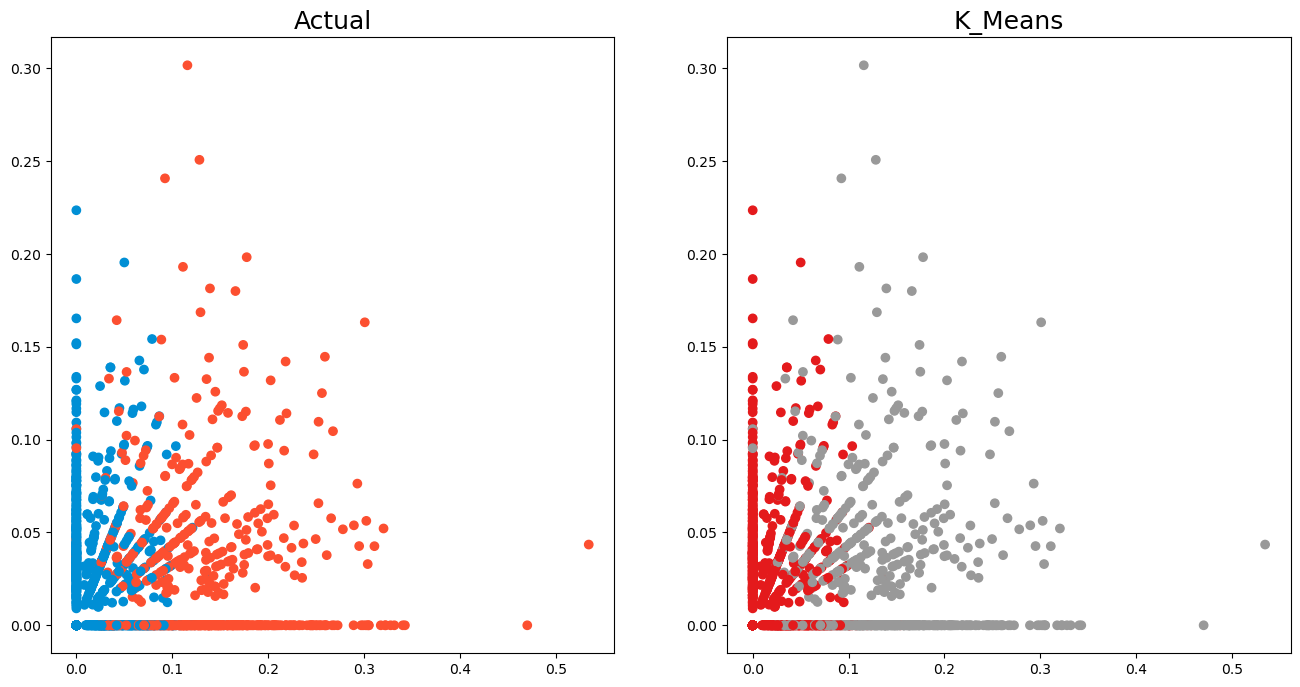

In [33]:
#visualising the clusters
fig, axes = plt.subplots(1, 2, figsize=(16,8))

fte_colors = {0: "#008fd5", 1: "#fc4f30"}
   
km_colors = [fte_colors[label] for label in kmeans.labels_]

axes[0].scatter(df['movi'], df['time'], c=km_colors)
axes[1].scatter(df['movi'], df['time'], c=kmeans.labels_, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [26]:
#append dataframe with cluster number
df['cluster'] = kmeans.labels_

In [27]:
#view proterties of each cluster
cluster1=df.query("cluster == 0")
cluster2=df.query("cluster == 1")

In [28]:
cluster1.shape

(1319, 10001)

In [29]:
cluster2.shape

(681, 10001)

In [30]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [31]:
len(cluster1.keys())

10001

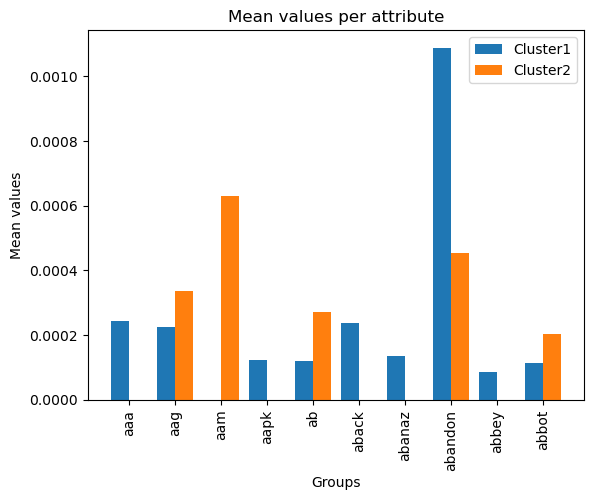

In [32]:
#visualised the first 10 features for the 2 clusters
cluster1_mean_p1 = cluster1_mean[:10]
cluster2_mean_p1 = cluster2_mean[:10]

X = cluster1.keys()[:10]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [35]:
######################################################
###             Hierarchical Clustering            ###
######################################################
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tv_reviews)

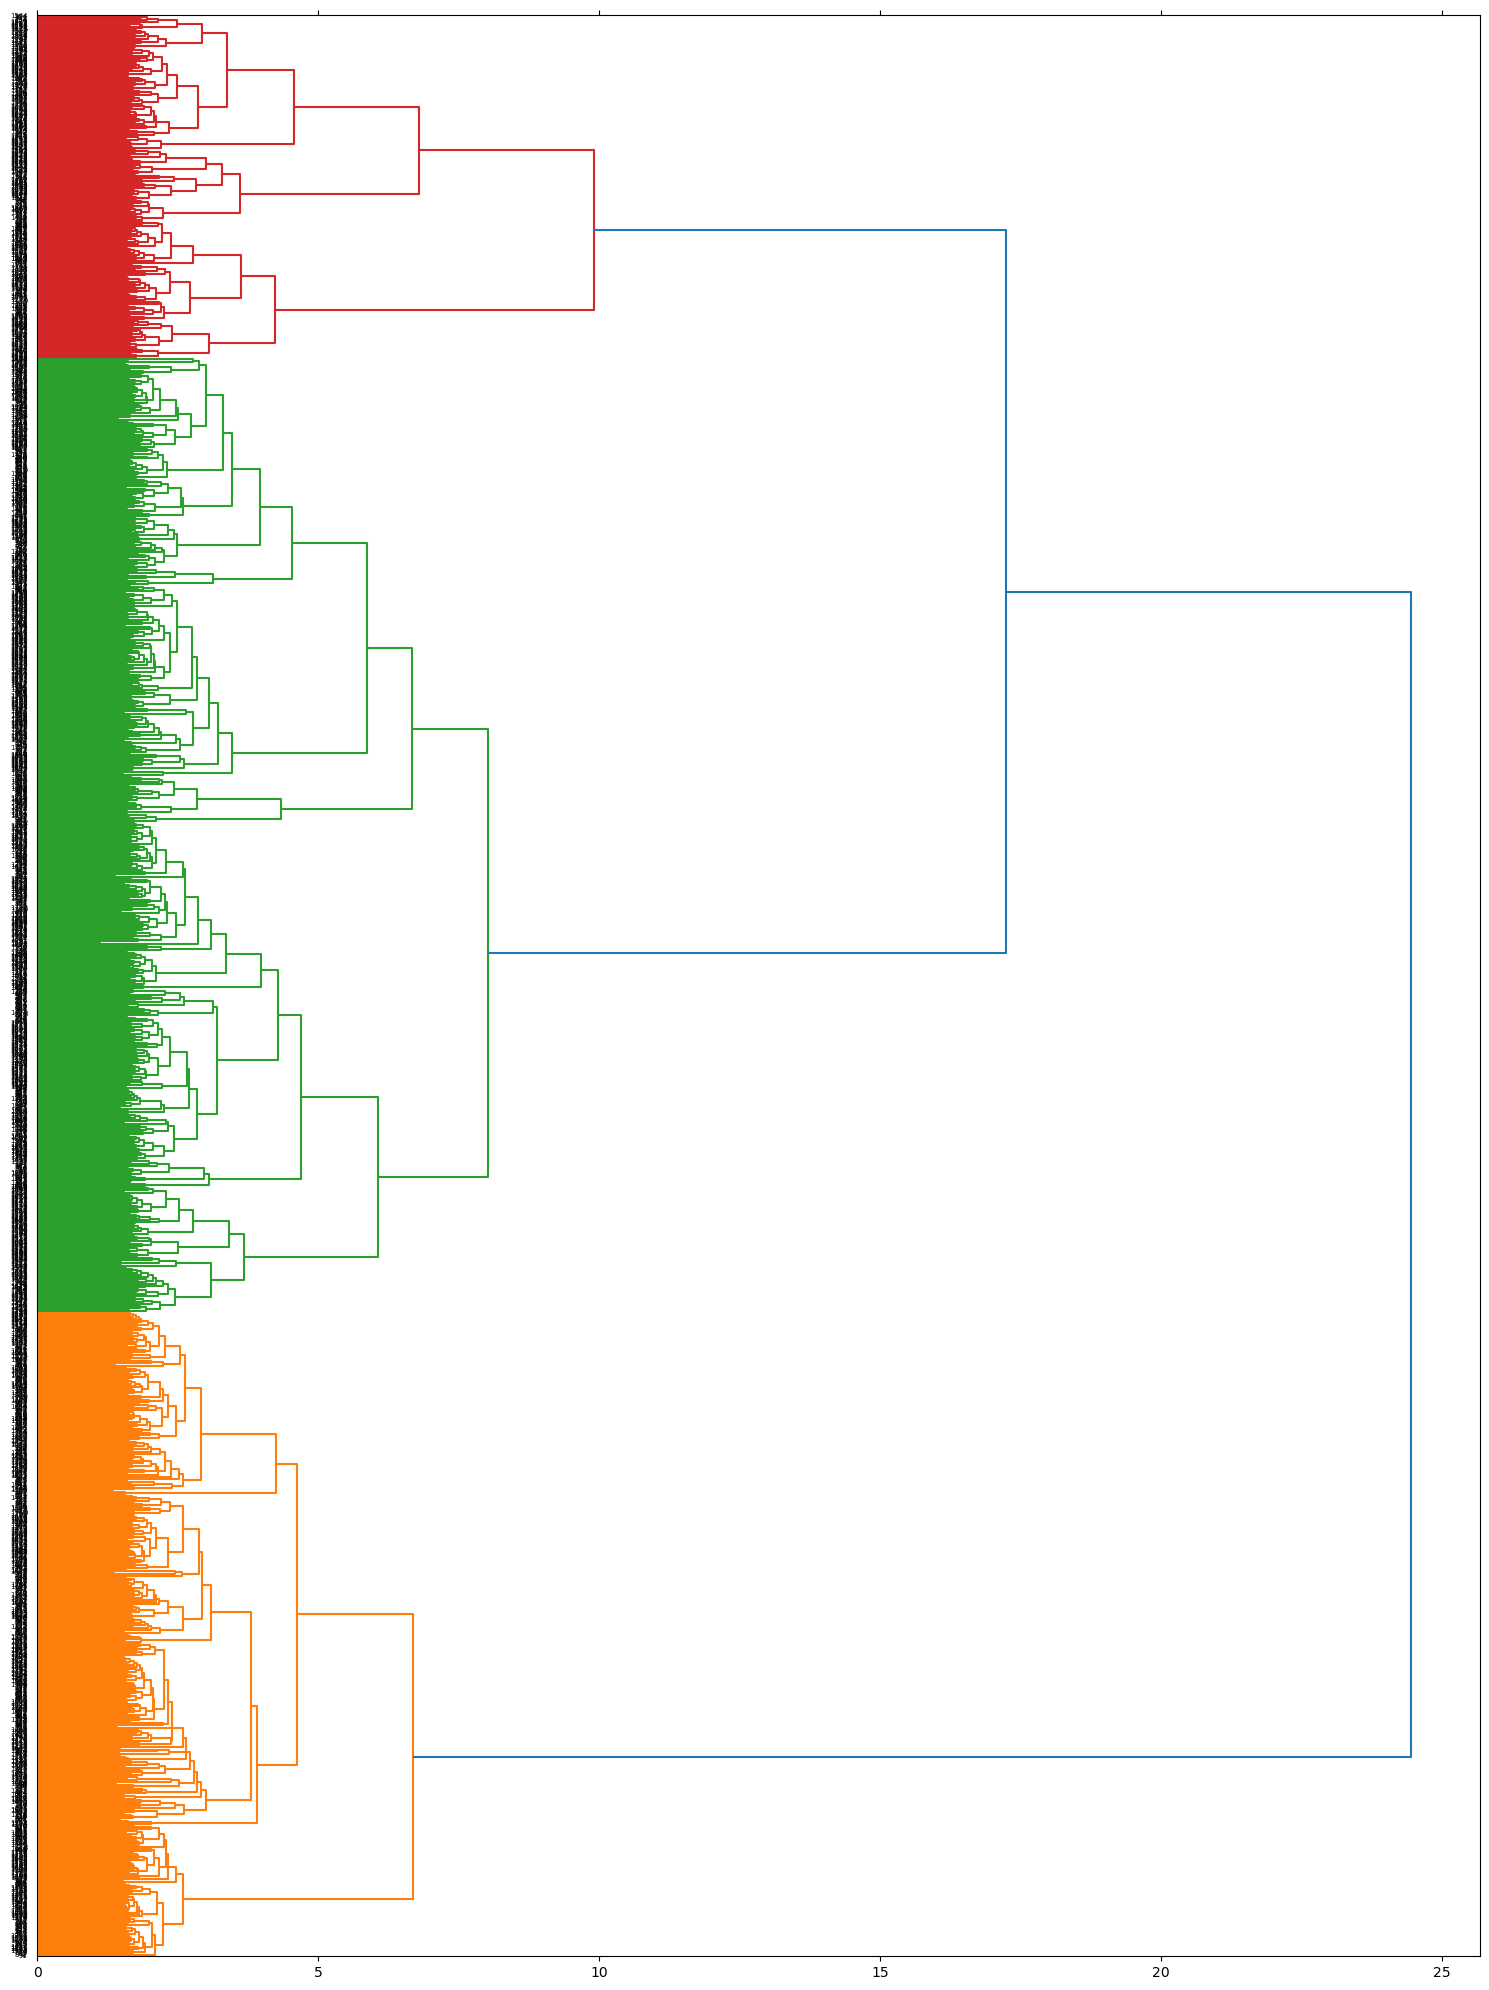

In [36]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout